# TASK 1 : Data Preparation

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Load and Read Data

In [101]:
def read_data(filename):
    data = pd.read_csv(filename)
    return data

In [102]:
data = read_data("./credit_risk_dataset.csv")

## 1.2 Split Input-Output Data

In [103]:
def split_input_output(data, target_col):
    y = data[target_col]
    X = data.drop(target_col, axis=1)
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X, y

In [104]:
X, y = split_input_output(data, "loan_status")

X shape: (32581, 11)
y shape: (32581,)


In [105]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [106]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed
    )
    print(f"X train shape : {X_train.shape}")
    print(f"y train shape : {y_train.shape}")
    print(f"X test shape : {X_test.shape}")
    print(f"y test shape : {y_test.shape}")
    return X_train, X_test, y_train, y_test

In [108]:
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2, seed=123)

X train shape : (26064, 11)
y train shape : (26064,)
X test shape : (6517, 11)
y test shape : (6517,)


In [109]:
print(len(X_train)/len(X))  # should be 0.8
print(len(X_test)/len(X))   # should be 0.2

0.7999754458119763
0.2000245541880237


In [110]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29488,37,29000,MORTGAGE,8.0,DEBTCONSOLIDATION,B,7750,NaN,0.27,N,16
26554,29,105000,MORTGAGE,13.0,PERSONAL,C,5000,12.53,0.05,N,9
12235,26,32000,RENT,6.0,MEDICAL,A,12000,8.94,0.38,N,3
12554,25,82729,OWN,8.0,VENTURE,A,4800,6.17,0.06,N,3
53,23,97000,RENT,7.0,VENTURE,B,30000,10.65,0.31,N,2


In [111]:
def split_numerical_categorical_features(data, numerical_cols, categorical_cols):
    numerical_data = data[numerical_cols]
    categorical_data = data[categorical_cols]
    return numerical_data, categorical_data

In [112]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [113]:
numerical_columns = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
    "cb_person_cred_hist_length"
]
categorical_columns = [
    "person_home_ownership", "loan_intent", "loan_grade", 
    "cb_person_default_on_file"
]

X_train_numerical, X_train_categorical = split_numerical_categorical_features(
    X_train, numerical_columns, categorical_columns
)

## 1.3 EDA before Preprocessing

In [115]:
100 * (X_train.isna().sum(0) / len(X_train))

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.777778
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.572591
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

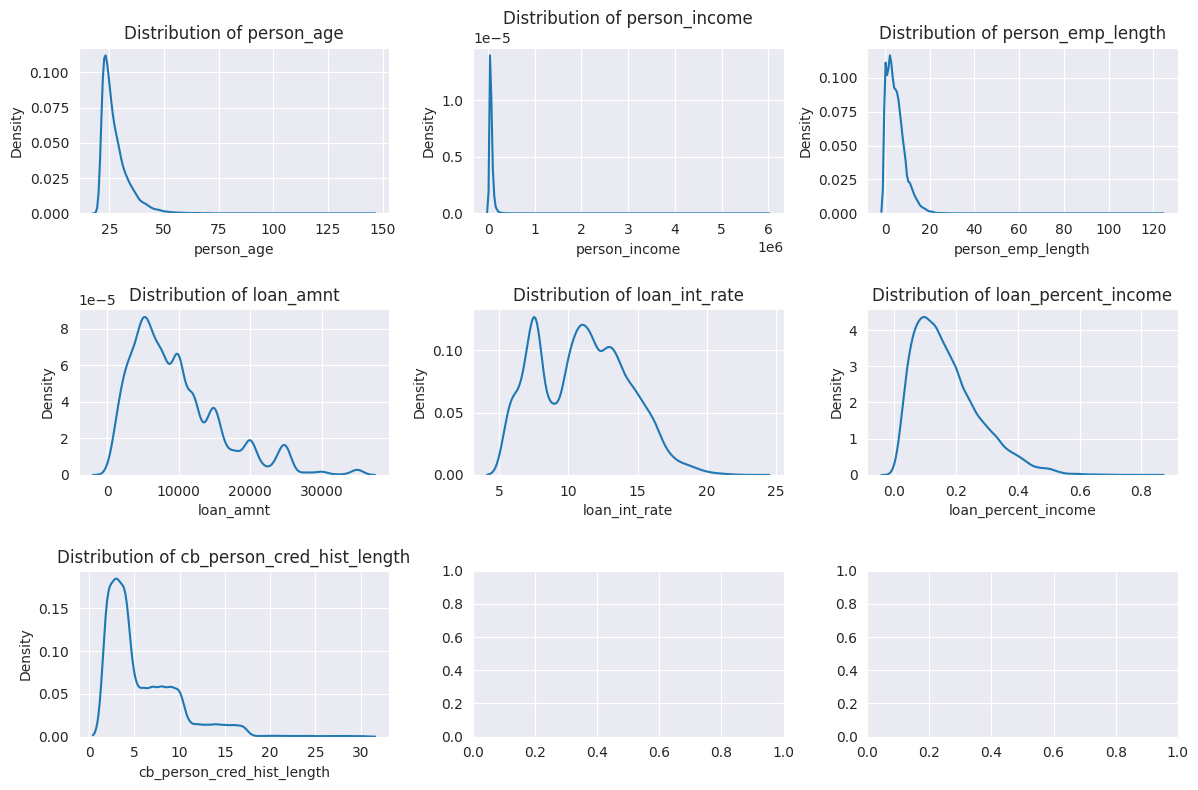

In [117]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_numerical):
    sns.kdeplot(X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [118]:
X_train_numerical.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25340.000000,26064.000000,23569.000000,26064.000000,26064.000000
mean,27.724025,6.616768e+04,4.804183,9600.931361,11.031591,0.170525,5.799877
std,6.345674,6.534012e+04,4.176927,6334.401266,3.244323,0.106724,4.064317
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


### 1.3.1 Create Imputer for Numerical Data

In [120]:
from sklearn.impute import SimpleImputer

def num_imputer_fit(data):
    numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    numerical_imputer.fit(data[numerical_columns])
    return numerical_imputer


def num_imputer_transform(data, numerical_imputer):
    imputed_data = numerical_imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)
    return imputed_data

In [121]:
num_imputer = num_imputer_fit(X_train_numerical)

X_train_numerical_imputed = num_imputer_transform(X_train_numerical, num_imputer)

### 1.3.2 Create Imputer for Categorical Data

In [122]:
from sklearn.impute import SimpleImputer


def cat_imputer_fit(data):
    categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    categorical_imputer.fit(data[categorical_columns])
    return categorical_imputer


def cat_imputer_transform(data, categorical_imputer):
    imputed_data = categorical_imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)
    return imputed_data

In [123]:
categorical_imputer = cat_imputer_fit(X_train_categorical)

X_train_categorical_imputed = cat_imputer_transform(X_train_categorical, categorical_imputer)

In [124]:
X_train_categorical_imputed.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29488,MORTGAGE,DEBTCONSOLIDATION,B,N
26554,MORTGAGE,PERSONAL,C,N
12235,RENT,MEDICAL,A,N
12554,OWN,VENTURE,A,N
53,RENT,VENTURE,B,N


### 1.3.3 Create a One-Hot-Encoder for Categorical Features

In [125]:
from sklearn.preprocessing import OneHotEncoder

def cat_encoder_fit(data):
    categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    categorical_encoder.fit(data[categorical_columns])
    return categorical_encoder


def cat_encoder_transform(data, categorical_encoder):
    encoded_data = categorical_encoder.transform(data)
    ohe_data = pd.DataFrame(encoded_data, columns=categorical_encoder.get_feature_names_out(), index=data.index)
    return ohe_data

In [126]:
categorical_encoder = cat_encoder_fit(X_train_categorical_imputed)

X_train_categorical_imputed_encoded = cat_encoder_transform(X_train_categorical_imputed, categorical_encoder)

In [127]:
# Validate  (JUST RUN THE CODE)
print('Original shape:', X_train_categorical_imputed.shape)
print('Encoded shape :', X_train_categorical_imputed_encoded.shape)

Original shape: (26064, 4)
Encoded shape : (26064, 19)


In [128]:
X_train_categorical_imputed_encoded.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
29488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1.3.4 Concat Data

In [129]:
def concat_data(numerical_data, categorical_data):
    return pd.concat([numerical_data, categorical_data], axis=1)

In [130]:
X_train_concat = concat_data(X_train_numerical_imputed, X_train_categorical_imputed_encoded)
X_train_concat.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
29488,37.0,29000.0,8.0,7750.0,10.99,0.27,16.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26554,29.0,105000.0,13.0,5000.0,12.53,0.05,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12235,26.0,32000.0,6.0,12000.0,8.94,0.38,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12554,25.0,82729.0,8.0,4800.0,6.17,0.06,3.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53,23.0,97000.0,7.0,30000.0,10.65,0.31,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1.3.5 Standardize Data

In [132]:
from sklearn.preprocessing import StandardScaler


def fit_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler


def transform_scaler(data, scaler):
    scaled_data_raw = scaler.transform(data)
    scaled_data_pd = pd.DataFrame(scaled_data_raw, columns=data.columns, index=data.index)
    return scaled_data_pd

In [133]:
scaler = fit_scaler(X_train_concat)

X_train_clean = transform_scaler(X_train_concat, scaler)

In [135]:
X_train_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,...,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04
mean,2.568030e-16,-2.998761e-18,-7.306072e-17,-1.044114e-16,-9.155762e-16,1.186555e-16,-7.674101e-17,-8.287484e-17,4.164188e-17,2.467162e-17,...,-2.508054e-17,-2.589839e-18,4.048327e-17,1.059108e-16,3.135068e-18,1.472119e-17,-8.723668e-18,3.094176e-17,-1.110905e-16,9.418835e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.217235e+00,-9.514655e-01,-1.160489e+00,-1.436774e+00,-1.817647e+00,-1.597850e+00,-9.349542e-01,-8.304306e-01,-6.048312e-02,-2.974038e-01,...,-4.632443e-01,-6.989427e-01,-6.883250e-01,-4.958120e-01,-3.579334e-01,-1.756404e-01,-8.614610e-02,-4.640241e-02,-2.167268e+00,-4.614105e-01
25%,-7.444625e-01,-4.249795e-01,-6.751159e-01,-7.263543e-01,-8.225391e-01,-7.545351e-01,-6.889057e-01,-8.304306e-01,-6.048312e-02,-2.974038e-01,...,-4.632443e-01,-6.989427e-01,-6.883250e-01,-4.958120e-01,-3.579334e-01,-1.756404e-01,-8.614610e-02,-4.640241e-02,4.614105e-01,-4.614105e-01
50%,-2.716904e-01,-1.709193e-01,-1.897431e-01,-2.527409e-01,-1.219079e-02,-1.923250e-01,-4.428571e-01,-8.304306e-01,-6.048312e-02,-2.974038e-01,...,-4.632443e-01,-6.989427e-01,-6.883250e-01,-4.958120e-01,-3.579334e-01,-1.756404e-01,-8.614610e-02,-4.640241e-02,4.614105e-01,-4.614105e-01
75%,3.586724e-01,1.963965e-01,5.383162e-01,4.182115e-01,6.749846e-01,5.572885e-01,5.413370e-01,1.204195e+00,-6.048312e-02,-2.974038e-01,...,-4.632443e-01,1.430733e+00,1.452802e+00,-4.958120e-01,-3.579334e-01,-1.756404e-01,-8.614610e-02,-4.640241e-02,4.614105e-01,-4.614105e-01
max,1.832401e+01,9.081627e+01,2.868994e+01,4.009780e+00,3.952033e+00,6.179389e+00,5.954404e+00,1.204195e+00,1.653354e+01,3.362432e+00,...,2.158688e+00,1.430733e+00,1.452802e+00,2.016893e+00,2.793816e+00,5.693451e+00,1.160819e+01,2.155060e+01,4.614105e-01,2.167268e+00


## 1.4 Perform Data Preprocessing

In [136]:
def preprocess_data(data, numerical_columns, categorical_columns, numerical_imputer, categorical_imputer, categorical_encoder, scaler):
    numerical_data = data[numerical_columns]
    numerical_data_imputed = num_imputer_transform(numerical_data, numerical_imputer)
    numerical_data_imputed = pd.DataFrame(
        numerical_data_imputed,
        columns=numerical_data.columns, index=numerical_data.index
    )

    categorical_data = data[categorical_columns]
    x_train_cat_imputed = cat_imputer_transform(categorical_data, categorical_imputer)
    x_train_cat_encoded = cat_encoder_transform(x_train_cat_imputed, categorical_encoder)
    cat_data_encoded = pd.DataFrame(
        x_train_cat_encoded,
    )

    merged_data = pd.concat([numerical_data_imputed, cat_data_encoded], axis=1)
    transformed_data = transform_scaler(merged_data, scaler)

    return transformed_data

In [137]:
# Preprocess training data (again)
numerical_columns = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
    "cb_person_cred_hist_length"
]
categorical_columns = [
    "person_home_ownership", "loan_intent", "loan_grade",
    "cb_person_default_on_file"
]

X_train_clean = preprocess_data(
    X_train, 
    numerical_columns, categorical_columns,
    num_imputer, categorical_imputer, categorical_encoder, 
    scaler
)

In [138]:
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

Original data shape: (26064, 11)
Cleaned data shape : (26064, 26)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
29488,1.461807,-0.568845,0.781003,-0.292209,-0.012191,0.932095,2.509725,1.204195,-0.060483,-0.297404,...,-0.463244,-0.698943,1.452802,-0.495812,-0.357933,-0.17564,-0.086146,-0.046402,0.46141,-0.46141
26554,0.201082,0.594322,1.994435,-0.726354,0.486984,-1.129342,0.787385,1.204195,-0.060483,-0.297404,...,-0.463244,-0.698943,-0.688325,2.016893,-0.357933,-0.17564,-0.086146,-0.046402,0.46141,-0.46141
12235,-0.271690,-0.522930,0.295630,0.378744,-0.676676,1.962814,-0.688906,-0.830431,-0.060483,-0.297404,...,-0.463244,1.430733,-0.688325,-0.495812,-0.357933,-0.17564,-0.086146,-0.046402,0.46141,-0.46141
12554,-0.429281,0.253468,0.781003,-0.757929,-1.574542,-1.035640,-0.688906,-0.830431,-0.060483,3.362432,...,2.158688,1.430733,-0.688325,-0.495812,-0.357933,-0.17564,-0.086146,-0.046402,0.46141,-0.46141
53,-0.744462,0.471883,0.538316,3.220424,-0.122398,1.306902,-0.934954,-0.830431,-0.060483,-0.297404,...,2.158688,-0.698943,1.452802,-0.495812,-0.357933,-0.17564,-0.086146,-0.046402,0.46141,-0.46141


In [ ]:
# Transform training data
X_test_clean = preprocess_data(
    X_test,
    numerical_columns, categorical_columns,
    num_imputer, categorical_imputer, categorical_encoder,
    scaler
)